###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Text Mining & Image Recognition
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 1

#### Cargar Librerias

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Problema 1

In [40]:
def CanalColor(imagen,color):

    ''' Funcion la cual recibe dos parametros, una imagen y un entero llamado color, la
        funcion devuelve una imagen la cual tiene activos los canales de color segun lo siguiente:
        
            Si el parametro color vale 1, la imagen muestra activos unicamente el color azul.
            Si el parametro color vale 2, la imagen muestra activos unicamente el color verde.
            Si el parametro color vale 3, la imagen muestra activos unicamente el color rojo.
            Si el parametro color vale 10, la imagen muestra activos unicamente los colores rojo y verde.
            Si el parametro color vale 20, la imagen muestra activos unicamente los colores verde y azul.
            Si el parametro color vale 30, la imagen muestra activos unicamente los colores azul y rojo.
    '''
    
    if (color== 1 or color== 2 or color== 3 or color== 10 or color== 20 or color== 30):
        # Cargar la imagen
        img= cv2.imread(imagen) 
        # Convertir la imagen de BGR a RGB
        img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        # Dimension de imagen
        alto=  img.shape[0]
        ancho= img.shape[1]
        # Espacio para la imagen resultante
        monocromo=np.zeros((alto,ancho,3))

        for i in range(0,alto):
            for j in range (0,ancho):

                pixel=img[i,j]

                # Extraemos canales, colores RGB
                red=pixel[0]
                green=pixel[1]
                blue=pixel[2]

                if color==1:

                    # Dejar unicamente Azul. Anular Rojo y Azul
                    monocromo[i,j]=[0,0,blue]
        
                elif color==2:

                    # Dejar unicamente Verde. Anular Rojo y Azul
                    monocromo[i,j]=[0,green,0]

                elif color==3:
            
                    # Dejar unicamente Rojo. Anular Verde y Azul
                    monocromo[i,j]=[red,0,0]

                elif color==10:

                    # Dejar unicamente Rojo y verde. Anular Azul
                    monocromo[i,j]=[red,green,0]

                elif color==20:
            
                    # Dejar unicamente Azul y verde. Anular Rojo
                    monocromo[i,j]=[0,green,blue]
        
                else:

                    # Dejar unicamente Azul y Rojo. Anular Verde
                    monocromo[i,j]=[red,0,blue]



        # Volverla Imagen
        cv2.imwrite("monocromo.jpg",monocromo) 
        # Cargar la imagen
        monocromo= cv2.imread("monocromo.jpg")
        # Ver la imagen
        plt.imshow(monocromo)
        plt.show()
    else:
        print("El valor de color ingresado es inválido,debe ser: 1,2,3,10,20 ó 30, esta es la imagen original:")
        # Cargar la imagen
        imagen= cv2.imread("AntiguaGuatemala.jpg") 
        # Convertir la imagen de BGR a RGB
        imagen= cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
        # Ver la imagen
        plt.imshow(imagen)
        plt.show()
        

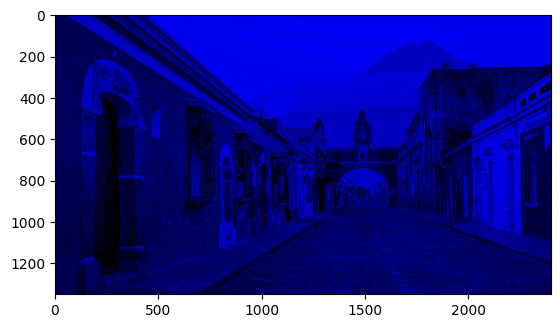

In [29]:
# Azul
CanalColor("AntiguaGuatemala.jpg",1)

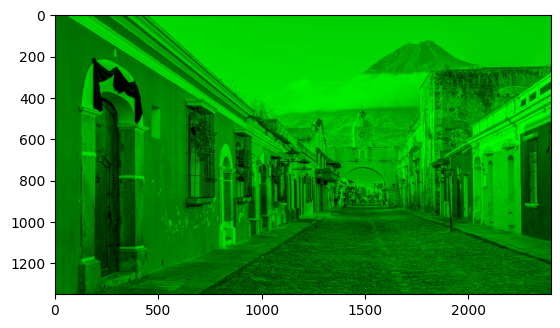

In [30]:
# Verde
CanalColor("AntiguaGuatemala.jpg",2)

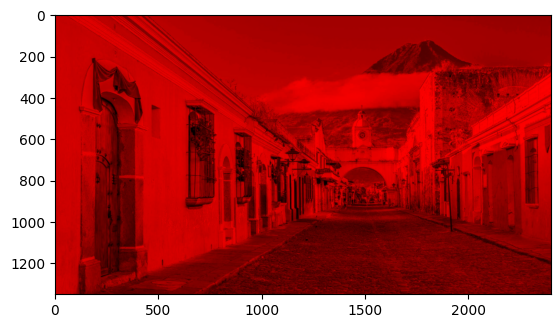

In [31]:
# Rojo
CanalColor("AntiguaGuatemala.jpg",3)

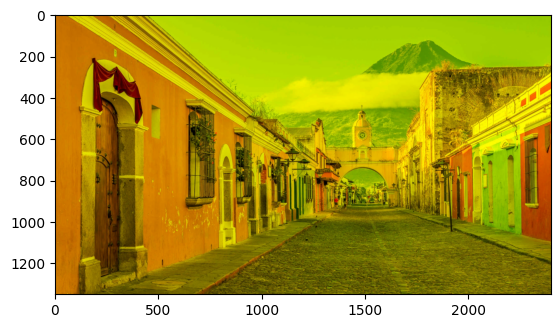

In [32]:
# Rojo y Verde
CanalColor("AntiguaGuatemala.jpg",10)

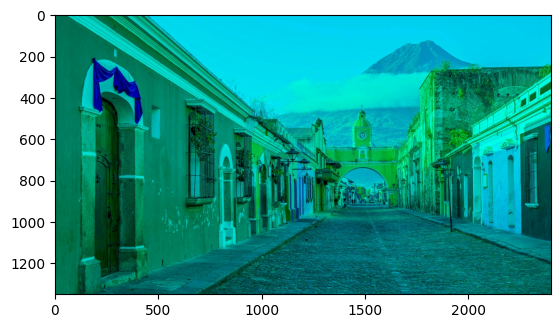

In [33]:
# Verde y Azul
CanalColor("AntiguaGuatemala.jpg",20)

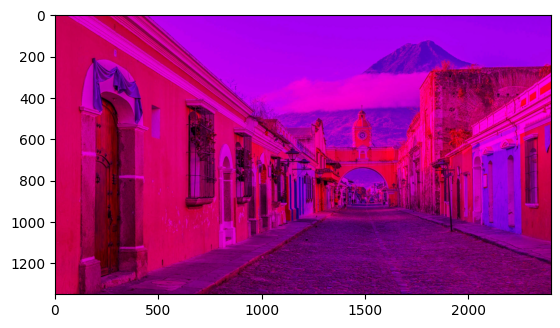

In [34]:
# Azul y Rojo
CanalColor("AntiguaGuatemala.jpg",30)

El valor de color ingresado es inválido,debe ser: 1,2,3,10,20 ó 30, esta es la imagen original:


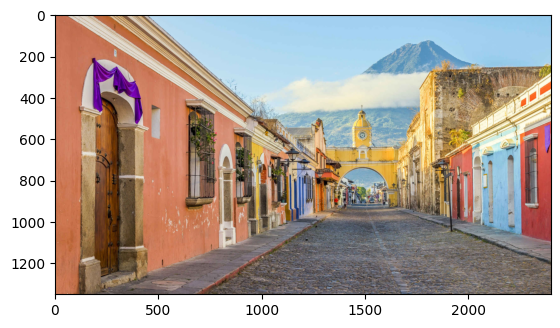

In [39]:
# Otro Valor
CanalColor("AntiguaGuatemala.jpg",5)